<a href="https://colab.research.google.com/github/rtajeong/AI_Cluster_MSAC/blob/main/gg_93_OpenCV_%EC%86%90%EA%B8%80%EC%94%A8_%EC%9D%B8%EC%8B%9D_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손글씨 숫자 인식
- 8x8 픽셀 숫자 데이터 5620개 사용

■ 먼저 sklearn이 제공하는 숫자 데이터를 load_digits() 함수로 불러올 수 있다. 아래는 불러온 숫자 데이터에서 두 번째 이미지를 출력한 것이다 (내용은 ‘1’임)

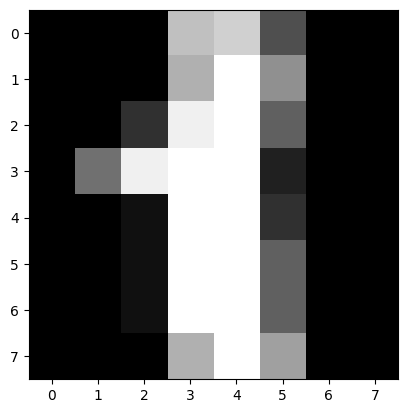

In [1]:
import cv2
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
digits = datasets.load_digits()
plt.imshow(digits.images[1], cmap="gray")
plt.show()

In [ ]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

■ 각 픽셀은 0~15의 숫자로 표현되는데 숫자가 크면 밝은 색을 나타낸다. 아래는 첫 번째 이미지의 내용을 나타냈다.

In [2]:
# 각 픽셀은 0~15의 숫자로 표현된다, 크면 밝은 색
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


■ 아래는 총 15개의 숫자 데이터를 읽어 이미지로 표현하는 코드이다.

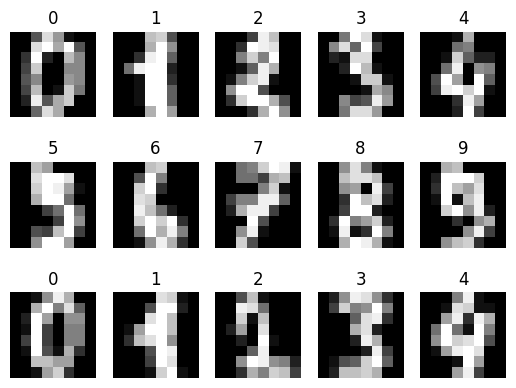

In [3]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")

plt.show()

In [6]:
x = digits.images
x = x.reshape((-1, 64))

from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

clf = svm.LinearSVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('accuracy_score : ',accuracy_score(y_test, y_pred))
clf.score(x_test, y_test)

accuracy_score :  0.9711111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9711111111111111

In [7]:
# 학습한 데이터 저장하기
import joblib
joblib.dump(clf, 'digits.pkl')

['digits.pkl']

In [8]:
def predict_digit(filename):
  # 학습한 데이터 읽어 들이기
    model = joblib.load("digits.pkl")
    my_img = cv2.imread(filename)
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16
    # 흑백 반전
    my_img = my_img.reshape((-1, 64))
    res = model.predict(my_img)
    return res[0]

In [9]:
!curl -L https://lh5.googleusercontent.com/akPIqDHLBBv01KyUKh5pGgSK8v1NuF51wB1h2FPj0CXbnnCyDvcznUVBVyb9x2dhHfH_x2Jzf_v_wVUn3vbXhs__3cTKJRSlu_RvlZN5rVCiYXlrX4qTjmV0tGq-unW8OF82uNz2 --output digit9.png
!curl -L https://lh6.googleusercontent.com/Llcq3vz4YjrJaDInz4dXK8fj1WK6mHTI0LPt_teD7q5EsVGM3eXr_raboptWUDfqfvDs-CGAvb-9PfDauFHM26R45HlVDfJCKkpCBwD-DUHGv6hwphK8WaBSVT-BdV3apouqzeW8 --output digit2.png
!curl -L https://lh4.googleusercontent.com/UUTHLTeBlKCwXjhZ9CLyI-7KXc0P1OSviCzKWHfKr5fDt8s44mfUZWhAWAd34eRcNyfk2OYZL8ySsJJgqSqNyWzMZS6fLC4K_8d1BZ9SsK5OkEpGDw4ubvKxfC85ZLMqREMoOpCp --output digit5.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24652  100 24652    0     0   105k      0 --:--:-- --:--:-- --:--:--  106k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19124  100 19124    0     0  74369      0 --:--:-- --:--:-- --:--:-- 74124
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24206  100 24206    0     0  89871      0 --:--:-- --:--:-- --:--:-- 89985


digit2.png = 4


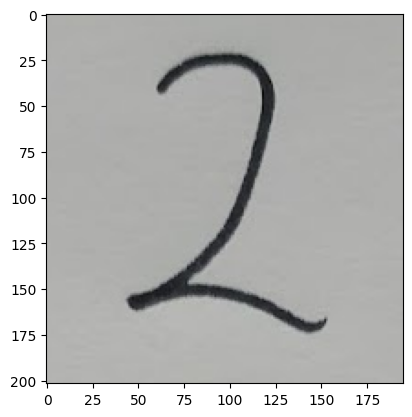

In [10]:
# 이미지 파일을 지정해서 실행하기
# 미리보기에서 클립보드에서 파일로 저장 실행
# 이미지 그리기도 미리보기에서 가능함
img = cv2.imread("digit2.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("digit2.png")
print("digit2.png = " + str(n))
plt.show()

digit9.png = 4


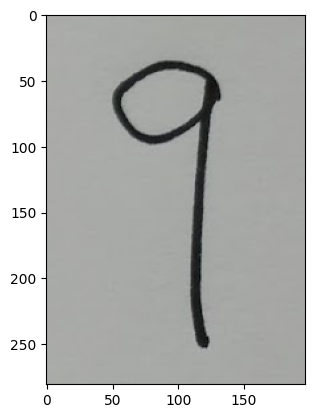

In [11]:
img = cv2.imread("digit9.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("digit9.png")
print("digit9.png = " + str(n))
plt.show()

digit5.png = 4


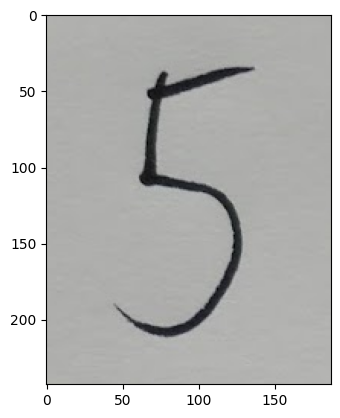

In [12]:
img = cv2.imread("digit5.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("digit5.png")
print("digit5.png = " + str(n))
plt.show()

# Exercise (using MNIST dataset)

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# use only the part of the dataset
x_train, y_train = train_images[:2000], train_labels[:2000]
x_test, y_test = test_images[:1000], test_labels[:1000]
# reshape
x_train = x_train.reshape(2000, 28*28)
x_test = x_test.reshape(1000, 28*28)

clf = svm.SVC(max_iter=2000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(clf.score(x_test, y_test))

11490434/11490434 [==============================] - 1s 0us/step
0.905


In [ ]:
def predict_digit2(model, filename):

    my_img = cv2.imread(filename)
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (28, 28))
    my_img = 255 - my_img
    # 흑백 반전
    my_img = my_img.reshape((-1, 28*28))
    res = model.predict(my_img)
    return res[0]

digit2.png = 2


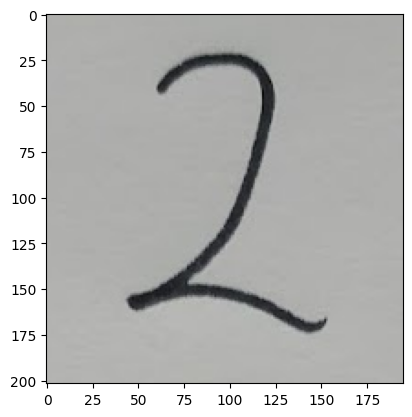

In [ ]:
img = cv2.imread("digit2.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit2(clf, "digit2.png")
print("digit2.png = " + str(n))
plt.show()

digit5.png = 5


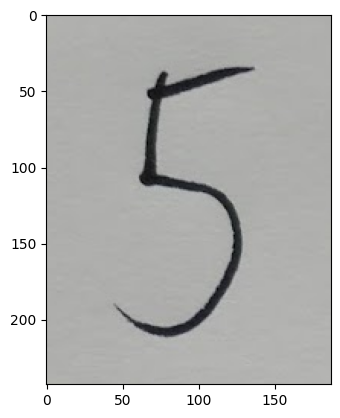

In [ ]:
img = cv2.imread("digit5.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit2(clf, "digit5.png")
print("digit5.png = " + str(n))
plt.show()

digit9.png = 2


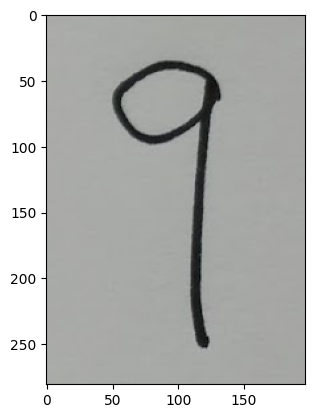

In [ ]:
img = cv2.imread("digit9.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit2(clf, "digit9.png")
print("digit9.png = " + str(n))
plt.show()

In [ ]:
import joblib
joblib.dump(clf, 'digits2.pkl')

['digits2.pkl']